In [2]:
import time
import os
import cv2
import matplotlib.pyplot as plt
from lib.utilities import *
import numpy as np
import pandas as pd

In [3]:
data_dir = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/"

plt.rcParams.update({'font.size': 13})
#plt.rcParams['figure.figsize'] = [20, 12]

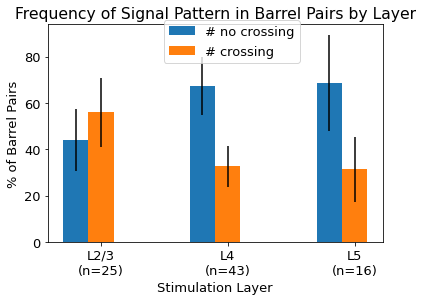

In [5]:
# Results 2/8/23 - 6/30/23
# in format # no crossing, # crossing, # no signal; l2/3, L4, L5
n_L23 = 68 - 43
n_L4 = 88 - 45
n_L5 = 18 - 2
# in columns L23, L4, L5
crossing_data = {
    "# no crossing": [11, 29, 11],
    '# crossing': [14, 14, 5],
    #'# no signal': [43, 45, 2],
    #"L2/3": [3, 17, 30],
    #"L4": [38, 20, 30],
    #"L5": [8, 13, 1]
}
errbars = {}
for k in crossing_data:
    errbars[k] = [np.sqrt(x) for x in crossing_data[k]]
    crossing_data[k][0] /= n_L23 / 100
    crossing_data[k][1] /= n_L4 / 100
    crossing_data[k][2] /= n_L5 / 100
    errbars[k][0] /= n_L23 / 100
    errbars[k][1] /= n_L4 / 100
    errbars[k][2] /= n_L5 / 100

labels = [x for x in crossing_data.keys()]

# plot this as bars 
plt.clf()
i = 0
for nm in crossing_data:
    x = np.arange(3)
    if i == 1:
        plt.bar(x + (i-1) * 0.2, 
                crossing_data[nm],
                0.2,
                label=nm,
                tick_label=['L2/3\n(n='+str(n_L23)+')', 
                            'L4\n(n='+str(n_L4)+')', 
                            'L5\n(n='+str(n_L5)+')'])
    else:
        plt.bar(x + (i-1) * 0.2, 
                crossing_data[nm],
                0.2,
                label=nm)
    plt.errorbar(x + (i-1) * 0.2, 
                crossing_data[nm],
                yerr=errbars[nm],
                fmt='none',
                color='black')
    i += 1
    
plt.title("Frequency of Signal Pattern in Barrel Pairs by Layer")
plt.xlabel("Stimulation Layer")
plt.ylabel("% of Barrel Pairs")
#plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(0.55, 1.05), loc='upper center')
plt.savefig(data_dir + "results_count_prelim_6-30-23.png")
plt.show()

In [4]:
# work with latency data
# Load data, not from Drive for Desktop since PhotoZ complains about loading zda from Drive
csv_prefix = 'scnn1a_all_slices.csv'
csv_columns = ['Date',
             'Slice/Loc/Rec',
             'Stim Location',
             'L4 barrel 1 Latency',
             'L4 barrel 2 Latency',
             'L4 barrel 3 Latency',
             'L4 barrel 1 SNR',
             'L4 barrel 2 SNR',
             'L4 barrel 3 SNR',
             'ROI jpg',
              'Age',
              'Infusion',
              'Sex',
              'Stim (uA)',
              'Delta latency 1 (barrel 1 - barrel 2)',
              'Delta latency 2 (barrel 3 - barrel 2)']

# Load reference data for all slices
reference_file = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/scnn1a_catalog.csv"
reference_df = pd.read_csv(reference_file)
ref_cols = ['Age', 
          'Sex', 
          "Infusion", 
          'Stim (uA)']

# load the all-data CSV dir
df = pd.read_csv(data_dir + csv_prefix)
df = pd.DataFrame(df)
df

,Date,Slice/Loc/Rec,Stim Location,L4 barrel 1 Latency,L4 barrel 2 Latency,L4 barrel 3 Latency,L4 barrel 1 SNR,L4 barrel 2 SNR,L4 barrel 3 SNR,ROI jpg,Age,Infusion,Sex,Stim (uA),Delta latency 1 (barrel 1 - barrel 2),Delta latency 2 (barrel 3 - barrel 2),abs(delta 1),abs(delta 2)
0,2/28/2023,02_01_01,L5,50.3009,50.8406,49.3457,2.940390,10.630900,6.484390,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,NaN,-1.4949,NaN,1.4949
1,2/28/2023,02_02_02,L5,49.9882,51.3212,51.1805,2.045210,5.142090,2.921330,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,NaN,NaN,NaN,NaN
2,2/28/2023,03_01_01,L2/3,52.5719,51.2136,52.9013,9.405090,10.237200,5.780930,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,1.3583,1.6877,1.3583,1.6877
3,2/28/2023,03_02_02,L2/3,51.8399,50.0310,50.7536,14.738200,35.400200,21.883200,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,1.8089,0.7226,1.8089,0.7226
4,2/28/2023,06_01_01,L5,51.1367,51.0128,50.4326,5.726470,13.058300,13.063500,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,0.1239,-0.5802,0.1239,0.5802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,6/28/2023,02_04_03,L4,58.3278,94.0000,94.0000,1.284740,0.000000,0.000000,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,83,GABAzine,F,200,NaN,NaN,NaN,NaN
86,6/28/2023,03_01_10,L4,94.0000,51.1749,51.3676,0.000000,0.263371,1.110580,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,83,GABAzine,F,200,NaN,NaN,NaN,NaN
87,6/28/2023,03_02_03,L4,58.9868,58.3472,94.0000,0.077615,0.514122,0.000000,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,83,GABAzine,F,200,NaN,NaN,NaN,NaN
88,6/28/2023,03_03_01,L4,50.7398,94.0000,94.0000,0.862532,0.000000,0.000000,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,83,GABAzine,F,200,NaN,NaN,NaN,NaN


Latency between barrel pairs in L2/3
	 0.900 +/- 0.579 (n = 14)
	 [1.3583 1.8089 0.5078 0.8922 1.1776 0.2455 0.0147 1.6877 0.7226 1.9021
 0.7541 0.433  0.7534 0.3538]
Latency between barrel pairs in L4
	 0.678 +/- 0.526 (n = 15)
	 [0.1687 1.0151 1.3033 0.826  0.456  0.0656 0.4992 0.8238 1.2135 0.2154
 0.1898 0.4909 0.6745 2.048  0.1808]
Latency between barrel pairs in L5
	 0.793 +/- 0.475 (n = 6)
	 [0.1239 0.5098 1.4949 0.5802 0.724  1.3297]


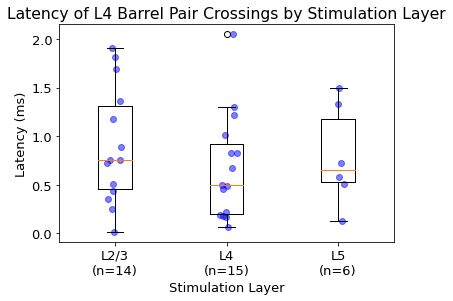

In [5]:
# plot latency spreads, separated by layer

df['abs(delta 1)'] = np.abs(df['Delta latency 1 (barrel 1 - barrel 2)'])
df['abs(delta 2)'] = np.abs(df['Delta latency 2 (barrel 3 - barrel 2)'])


plt.clf()
i = 1
xtick_labels = []
df_datasets = []
for stim_loc in ['L2/3', 'L4', 'L5']:
    df2 = df[df['Stim Location'].str.contains(stim_loc)]
    dfd1 = df2['abs(delta 1)'].dropna()
    dfd2 = df2['abs(delta 2)'].dropna()

    print("Latency between barrel pairs in", stim_loc)
    dfds = np.concatenate([dfd1, dfd2])
    print("\t", 
          str(np.mean(dfds))[:5], 
          "+/-", 
          str(np.std(dfds))[:5], 
          "(n =", 
          str(len(dfds)) + ")")
    print("\t", dfds)
    
    jittered_xs = np.random.normal(i, 0.04, dfds.shape[0])
    plt.scatter(jittered_xs, dfds, alpha=0.5, color='blue')

    xtick_labels.append(stim_loc + "\n(n=" + str(len(dfds)) +")")
    df_datasets.append(dfds)
    i += 1

plt.boxplot(df_datasets)
plt.xticks(range(1, len(xtick_labels)+1), xtick_labels)
plt.title("Latency of L4 Barrel Pair Crossings by Stimulation Layer")
plt.xlabel("Stimulation Layer")
plt.ylabel("Latency (ms)")
plt.savefig(data_dir + "results_latency_prelim_6-30-23.png")
plt.show()

     Index     Cell 1     Cell 2     Cell 3
0        0  11.465200  15.436400  11.959000
1        1  10.643300  14.161100  11.154400
2        2   9.257740  12.330300   9.668380
3        3   7.476610  10.021500   7.665680
4        4   5.780280   7.693800   5.675050
..     ...        ...        ...        ...
195    195   0.783194   0.808717   0.887737
196    196   0.874195   1.305960   0.800768
197    197   0.787404   1.790920   0.507184
198    198   0.695885   2.293020   0.111556
199    199   0.806976   2.752740  -0.187036

[200 rows x 4 columns]


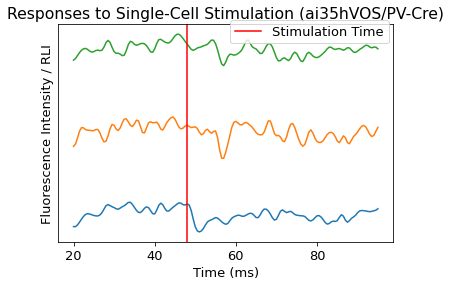

In [21]:
# 6/30 single cell stim traces
traces_barrel_1 = data_dir + "06-30-23/selected_zda/Traces_03_02_04.dat"
traces_barrel_1 = pd.read_csv(traces_barrel_1,
                         sep='\t',
                         header=0,
                         names=['Index',  'Cell 1',  'Cell 2',  'Cell 3'])
print(traces_barrel_1)
plt.clf()
start_cut = 40
end_cut = 190
baseline = 10
v1 = traces_barrel_1.loc[start_cut:end_cut, ["Cell 1"]] + baseline
v2 = traces_barrel_1.loc[start_cut:end_cut, ["Cell 2"]] + baseline * 2
v3 = traces_barrel_1.loc[start_cut:end_cut, ["Cell 3"]] + baseline * 3
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1)
plt.plot(t, v2)
plt.plot(t, v3)
plt.axvline(x=48, label="Stimulation Time", color='red')
plt.legend(bbox_to_anchor=(0.75, 1.05), loc='upper center')
plt.yticks([])
plt.xlabel("Time (ms)")
plt.ylabel("Fluorescence Intensity / RLI")
plt.title("Responses to Single-Cell Stimulation (ai35hVOS/PV-Cre)")
plt.savefig(data_dir + "06-30-23/selected_zda/traces-single-cell.png")
plt.show()